<a href="https://colab.research.google.com/github/rakshitha-sathyakumar/gender-recognition-by-voice/blob/master/gender_recognition_by_voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 256 assignment 1

### For this assignment, I have considered Gender recognition by voice dataset from kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv("/content/voice.csv")

# Data preprocessing

## Understanding the data

In [ ]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [ ]:
df.shape

(3168, 21)

In [ ]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

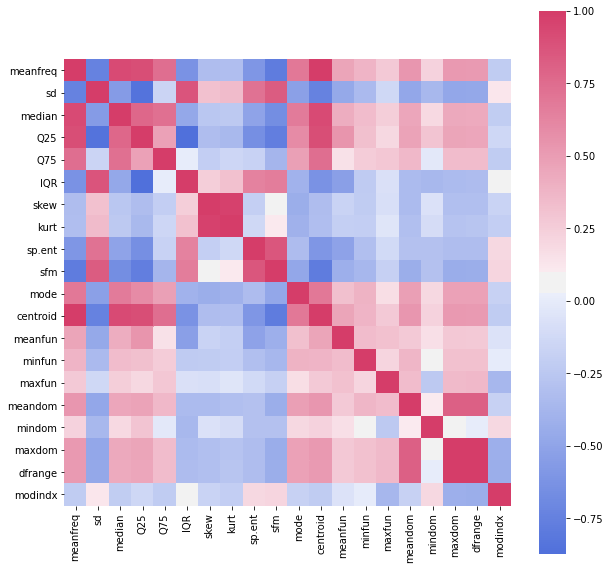

In [ ]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

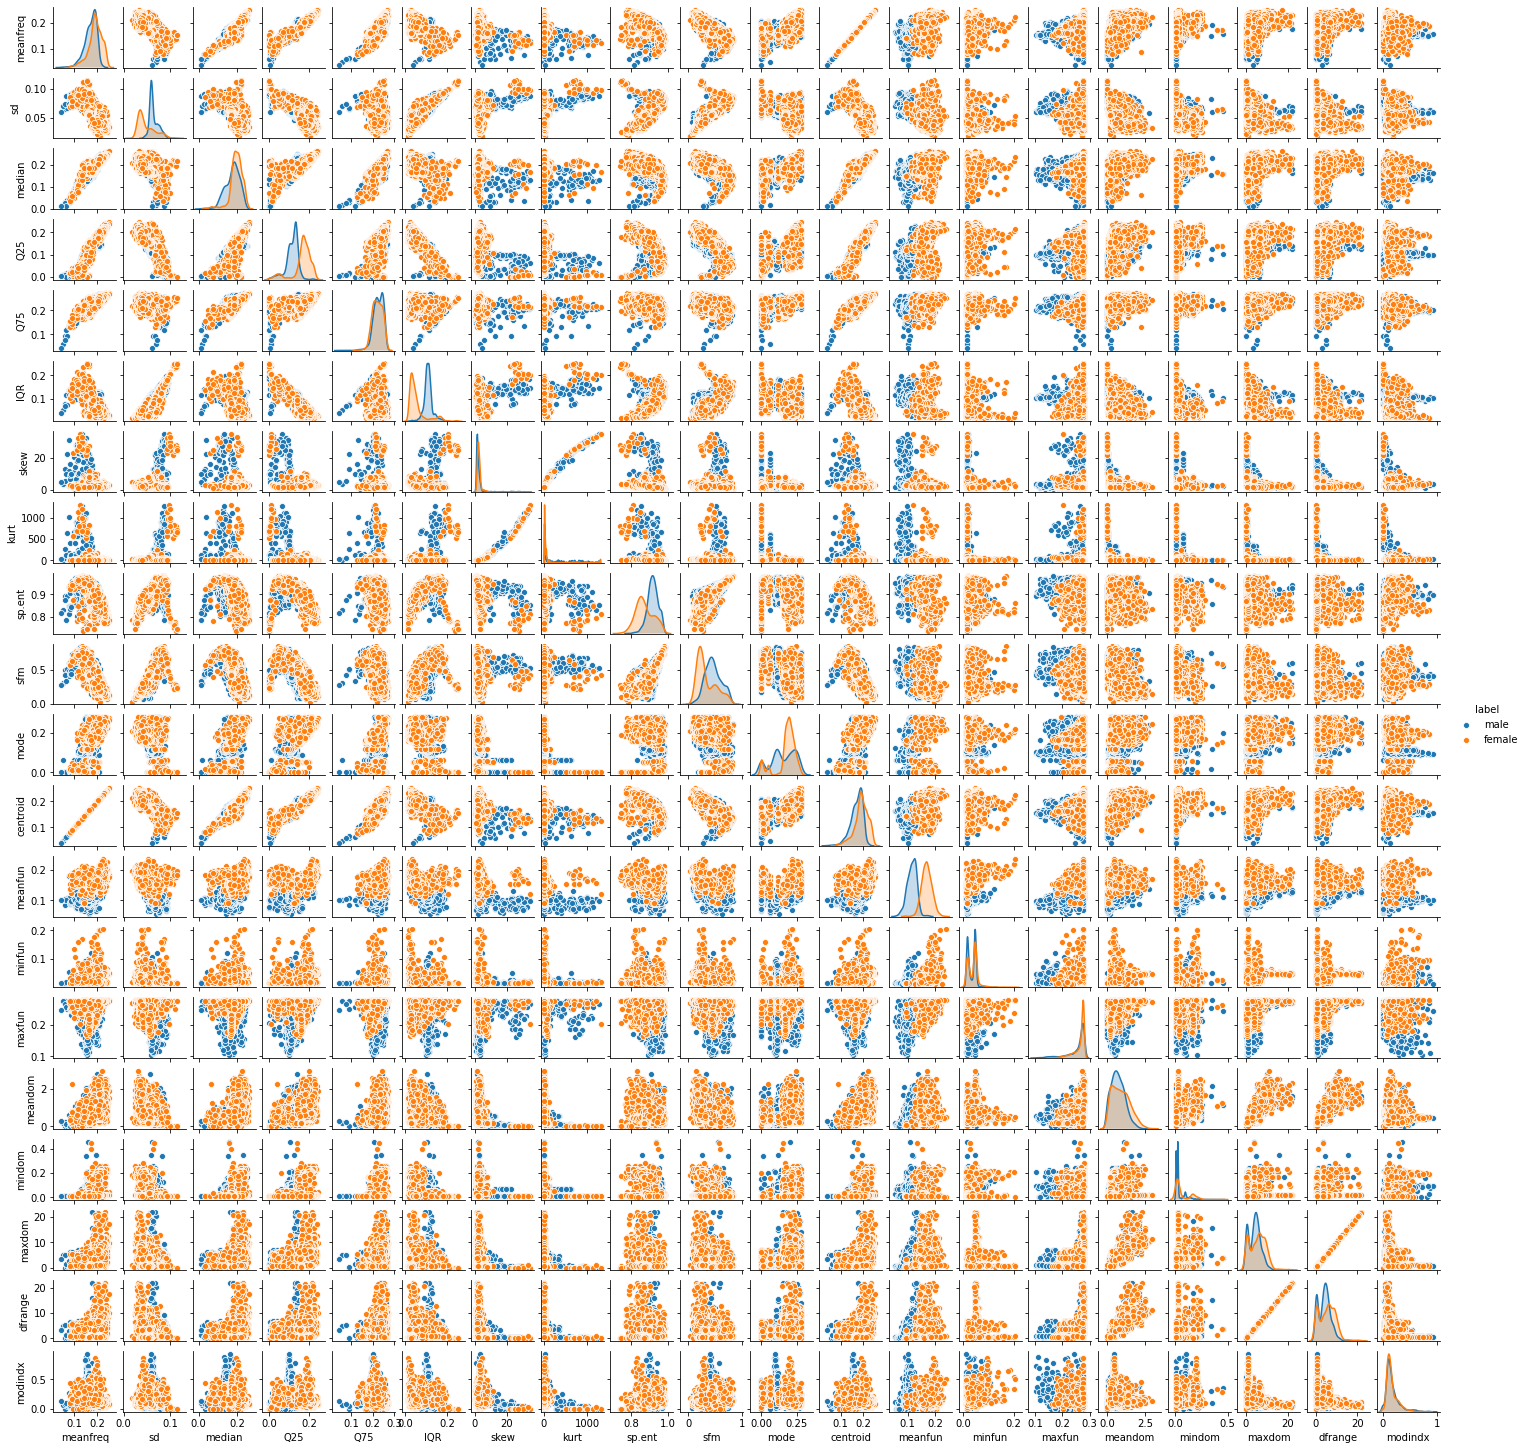

In [ ]:
sns.pairplot(df, hue='label', height=1);

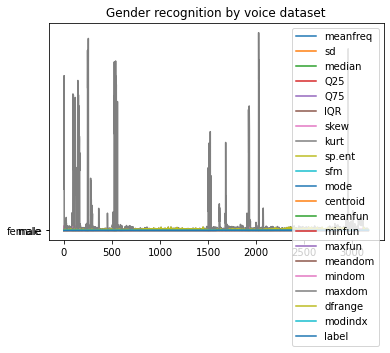

In [ ]:
columns = df.columns
x_data = range(0, df.shape[0])
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df[column], label=column)
# set title and legend
ax.set_title('Gender recognition by voice dataset')
ax.legend()

Text(0.5, 1.0, 'Median')

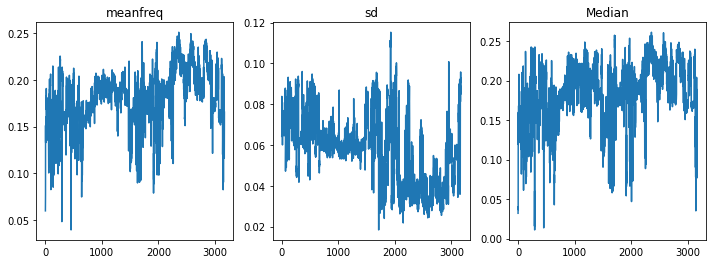

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(df['meanfreq'])
axes[0].set_title("meanfreq")

axes[1].plot(df['sd'])
axes[1].set_title("sd")

axes[2].plot(df['median'])
axes[2].set_title("Median")

Text(0.5, 1.0, 'IQR')

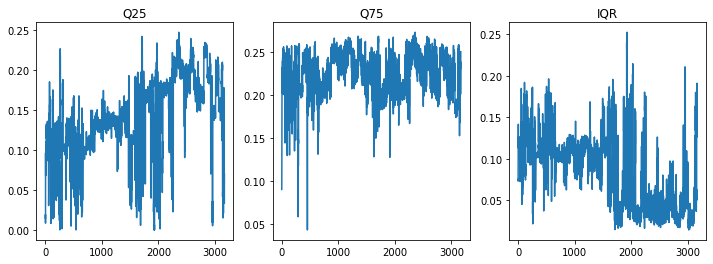

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(df['Q25'])
axes[0].set_title("Q25")

axes[1].plot(df['Q75'])
axes[1].set_title("Q75")

axes[2].plot(df['IQR'])
axes[2].set_title("IQR")

Text(0.5, 1.0, 'sp.ent')

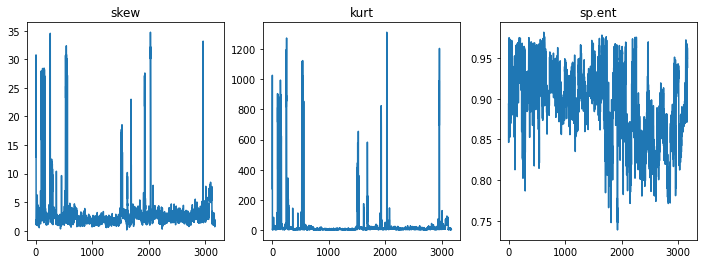

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(df['skew'])
axes[0].set_title("skew")

axes[1].plot(df['kurt'])
axes[1].set_title("kurt")

axes[2].plot(df['sp.ent'])
axes[2].set_title("sp.ent")

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label']) 
df['label'].unique() 

array([1, 0])

In [ ]:
X = df.drop(['label'], axis =1)
y = df['label']

In [ ]:
scores = {}
cv_s= {}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 33)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print('Training accuracy: {}'.format(lr_clf.score(X_train, y_train)))
print('Testing accuracy: {}'.format(lr_clf.score(X_test,y_test)))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Training accuracy: 0.8102891520862118
Testing accuracy: 0.7811009802300074
Mean squared error: 0.05
Coefficient of determination: 0.78


### Feature importance

In [ ]:
importance = []
for i,v in enumerate(lr_clf.coef_):
    print('Feature: %0d, Score: %.2f' % (i,v))
    importance.append(v)

Feature: 0, Score: -3265218976.62
Feature: 1, Score: 0.47
Feature: 2, Score: -0.30
Feature: 3, Score: -3693520443104.19
Feature: 4, Score: 3445484390519.14
Feature: 5, Score: -3546814916840.87
Feature: 6, Score: -1.26
Feature: 7, Score: 0.77
Feature: 8, Score: -0.11
Feature: 9, Score: -0.38
Feature: 10, Score: 0.16
Feature: 11, Score: 3265218976.44
Feature: 12, Score: -2.21
Feature: 13, Score: 0.64
Feature: 14, Score: 0.15
Feature: 15, Score: -0.21
Feature: 16, Score: -199246584.12
Feature: 17, Score: 9591259226.06
Feature: 18, Score: -9584403429.57
Feature: 19, Score: 0.02


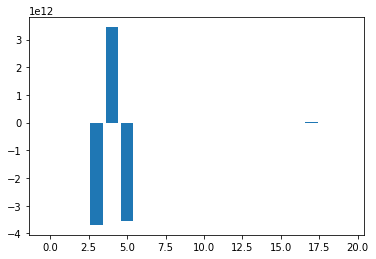

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From this we will get the most important features

# Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
print('Training accuracy : {}'.format(clf.score(X_train, y_train)))
print('Testing accuracy: {}\n'.format(clf.score(X_test,y_test)))
scores['Naive Bayes']=[clf.score(X_train, y_train),clf.score(X_test,y_test)]

Training accuracy : 0.8997632202052092
Testing accuracy: 0.9242902208201893



In [ ]:
cv_scores = cross_val_score(clf, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(clf, X_test, y_test,cv = 5)
cv_s['Naive Bayes']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.87771203 0.93096647 0.87573964 0.91715976 0.89328063]
Mean cross-validation training score (5-fold): 0.899


# K-Nearest Neighbour

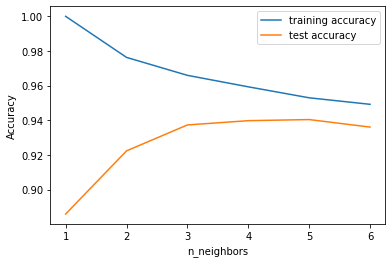

In [ ]:
train_accuracy = []
test_accuracy = []

for x in range(1,7):
    knr = KNeighborsRegressor(n_neighbors = x)
    knr.fit(X_train, y_train)
    train_accuracy.append(knr.score(X_train, y_train))
    test_accuracy.append(knr.score(X_test,y_test))

# Show the relationship of accuarcy and n_neighbors
plt.plot(range(1,7), train_accuracy, label = 'training accuracy')
plt.plot(range(1,7), test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
#The best n_neighbors is 3
scores['K-neighbors regression'] = [train_accuracy[2],test_accuracy[2]]

In [ ]:
# Cross Validation
knr = KNeighborsRegressor(n_neighbors = 3)
cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)
cv_s['K-neighbors regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.92808361 0.95441578 0.90867523 0.93591701 0.88711991]
Mean cross-validation training score (5-fold): 0.923


# Ridge

In [ ]:
# Alpha by default is 1.0
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
print('Training accuracy: {}'.format(ridge.score(X_train, y_train)))
print('Testing accuracy: {}'.format(ridge.score(X_test,y_test)))

Training accuracy: 0.9700078926598263
Testing accuracy: 0.9605678233438486


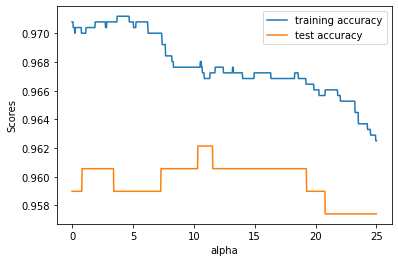

In [ ]:
a =np.linspace(0.001,25,1000)
training_accuracy = []
test_accuracy = []
for x in a:
    ridge = RidgeClassifier(alpha = x)
    ridge.fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test,y_test))
    
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

# Lasso

In [ ]:
lasso = Lasso(max_iter = 100000)
lasso.fit(X_train, y_train)
print('Training accuracy: {}'.format(lasso.score(X_train, y_train)))
print('Testing accuracy: {}'.format(lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training accuracy: 0.0
Testing accuracy: -0.0062464140122211465
Number of features used: 0


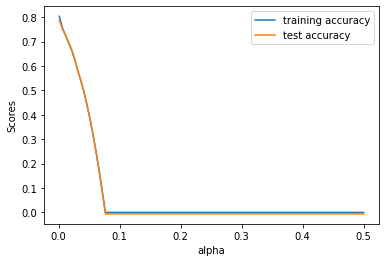

In [ ]:
a =np.linspace(0.001,0.5,100)
training_accuracy = []
test_accuracy = []
f = []
for x in a:
    lasso = Lasso(alpha = x, max_iter = 100000)
    lasso.fit(X_train, y_train)
    training_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test,y_test))
    f.append(np.sum(lasso.coef_!=0))
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

Here we can see very low accuracy bcoz Lasso penalizes the features with higher importance and the weights can be zero. If the weight of the feature is zero, it will completely eliminate the feature from the model. Hence the acuuracy rates.

# SVM with kernel 

In [ ]:
from sklearn.svm import SVC
# SVM, with kernel: (linear)
svr = SVC(kernel = 'linear')
svr.fit(X_train, y_train)
print('Training accuracy: {}'.format(svr.score(X_train, y_train)))
print('Testing accuracy: {}\n'.format(svr.score(X_test,y_test)))
scores['SVM']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]

Training accuracy: 0.9763220205209155
Testing accuracy: 0.9684542586750788



In [ ]:
cv_scores = cross_val_score(svr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(svr, X_test, y_test,cv = 5)
cv_s['SVM']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.97435897 0.98619329 0.96844181 0.98027613 0.96245059]
Mean cross-validation training score (5-fold): 0.974


# SVM without kernel

In [ ]:
# SVR without kernel
from sklearn.svm import LinearSVR
lsvr = LinearSVR()
lsvr.fit(X_train, y_train)
print('Training accuracy: {}'.format(lsvr.score(X_train, y_train)))
print('Testing accuracy: {}\n'.format(lsvr.score(X_test,y_test)))
scores['SVM without kernel']=[lsvr.score(X_train, y_train),lsvr.score(X_test,y_test)]

Training accuracy: 0.8059154875922684
Testing accuracy: 0.7735372062513953



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Cross Validation
cv_scores = cross_val_score(lsvr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lsvr, X_test, y_test,cv = 5)
cv_s['SVM without kernel']=[np.mean(cv_scores),np.mean(cv_test_scores)]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross-validation training scores (5-fold): [0.78361694 0.82827263 0.78834883 0.8252373  0.78107856]
Mean cross-validation training score (5-fold): 0.801


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

# Neural Network 

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=15)
loss,accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy))

Epoch 1/15
2534/2534 [==============================] - 1s 208us/step - loss: 0.6717 - accuracy: 0.5458
Epoch 2/15
2534/2534 [==============================] - 0s 59us/step - loss: 0.5483 - accuracy: 0.7206
Epoch 3/15
2534/2534 [==============================] - 0s 52us/step - loss: 0.4396 - accuracy: 0.9017
Epoch 4/15
2534/2534 [==============================] - 0s 45us/step - loss: 0.3839 - accuracy: 0.9408
Epoch 5/15
2534/2534 [==============================] - 0s 46us/step - loss: 0.3486 - accuracy: 0.9586
Epoch 6/15
2534/2534 [==============================] - 0s 47us/step - loss: 0.3237 - accuracy: 0.9661
Epoch 7/15
2534/2534 [==============================] - 0s 48us/step - loss: 0.3036 - accuracy: 0.9676
Epoch 8/15
2534/2534 [==============================] - 0s 52us/step - loss: 0.2870 - accuracy: 0.9712
Epoch 9/15
2534/2534 [==============================] - 0s 48us/step - loss: 0.2710 - accuracy: 0.9732
Epoch 10/15
2534/2534 [==============================] - 0s 47us/step - 